In [26]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Principe

On peut généraliser le modèle d'Ising à des graphes: l'énergie est calculée en prenant les voisins d'un noeud sur un graphe.

Soit $(V, E)$ un graphe avec $V$ ses noeuds et $E$ ses arêtes.

L'énergie du système peut être calculée par:

$H =  -\sum_{v_1 \in V}\sum_{v_2\in N(v_1)}\sigma_{v_1}\sigma_{v_2}J_{\sigma_{v_1}, \sigma_{v_2}} - h \sum_{v \in V}\sigma_{v}$

où $N(v)$ est l'ensemble des voisins de $v \in V$

En supposant J constant, on se ramène à une formule plus simple: 

$H =  -J\sum_{v_1 \in V}\sum_{v_2\in N(v_1)}\sigma_{v_1}\sigma_{v_2} - h \sum_{v \in V}\sigma_{v}$

# 2. Définition d'un graphe


In [274]:
def generate_graph(nb_nodes=100):

    node_spins = np.random.choice([1, -1], size=nb_nodes)

    edges = np.random.choice([1, 0], p=[.95, .05], size=(nb_nodes, nb_nodes))

    edges = np.abs(edges - edges.T)

    graph = nx.from_numpy_array(edges)
    
    return node_spins, graph


def generate_random_graph(nb_nodes=100, p=.01):
    node_spins = np.random.choice([1, -1], size=nb_nodes)
    graph = nx.generators.random_graphs.binomial_graph(n=nb_nodes, p=p)
    return node_spins, graph


node_spins, graph = generate_graph()

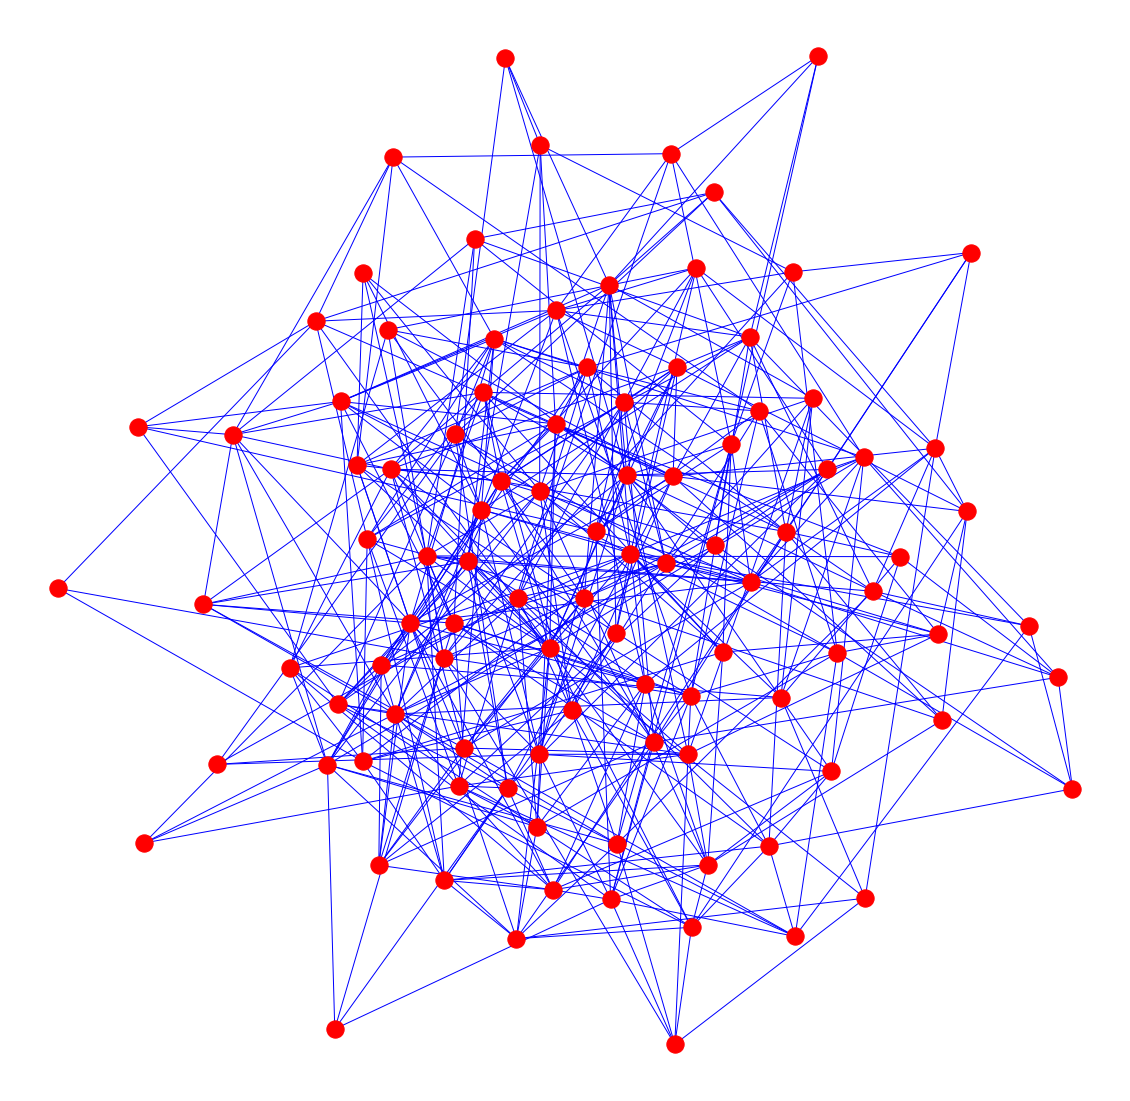

In [275]:
fig, ax = plt.subplots(figsize=(20, 20))

nx.draw(graph, ax=ax, node_color='red', edge_color='b')

In [276]:
def get_edge_color(v1, v2, node_spins):
    if node_spins[v1] == node_spins[v2]:
        if node_spins[v1] == 1:
            return '#FF000080'
        if node_spins[v1] == -1:
            return '#0000FF80'
        else:
            return 'green'
    else:
        return 'grey'

    
layout = nx.spring_layout(graph)

def plot_graph(graph, node_spins, layout):

    plt.figure(figsize=(20, 20))
    


    node_colors = ['red' if i == 1 else 'blue' for i in node_spins]




    edge_colors = [get_edge_color(v1, v2, node_spins) for v1, v2 in graph.edges]
    nx.draw_networkx_nodes(graph, pos=layout, node_color=node_colors)
    nx.draw_networkx_edges(graph, pos=layout, edge_color=edge_colors)

    plt.axis('off')
    plt.show()


In [277]:
def compute_graph_energy(graph, node_spins, J=1, h=0):

    node_energy = - h * node_spins.sum()
    edge_energy = - J * np.sum(
        [
            node_spins[v1] * node_spins[v2] for v1, v2 in graph.edges
        ]
    )

    return node_energy + edge_energy

compute_graph_energy(graph=graph, node_spins=node_spins)


-1

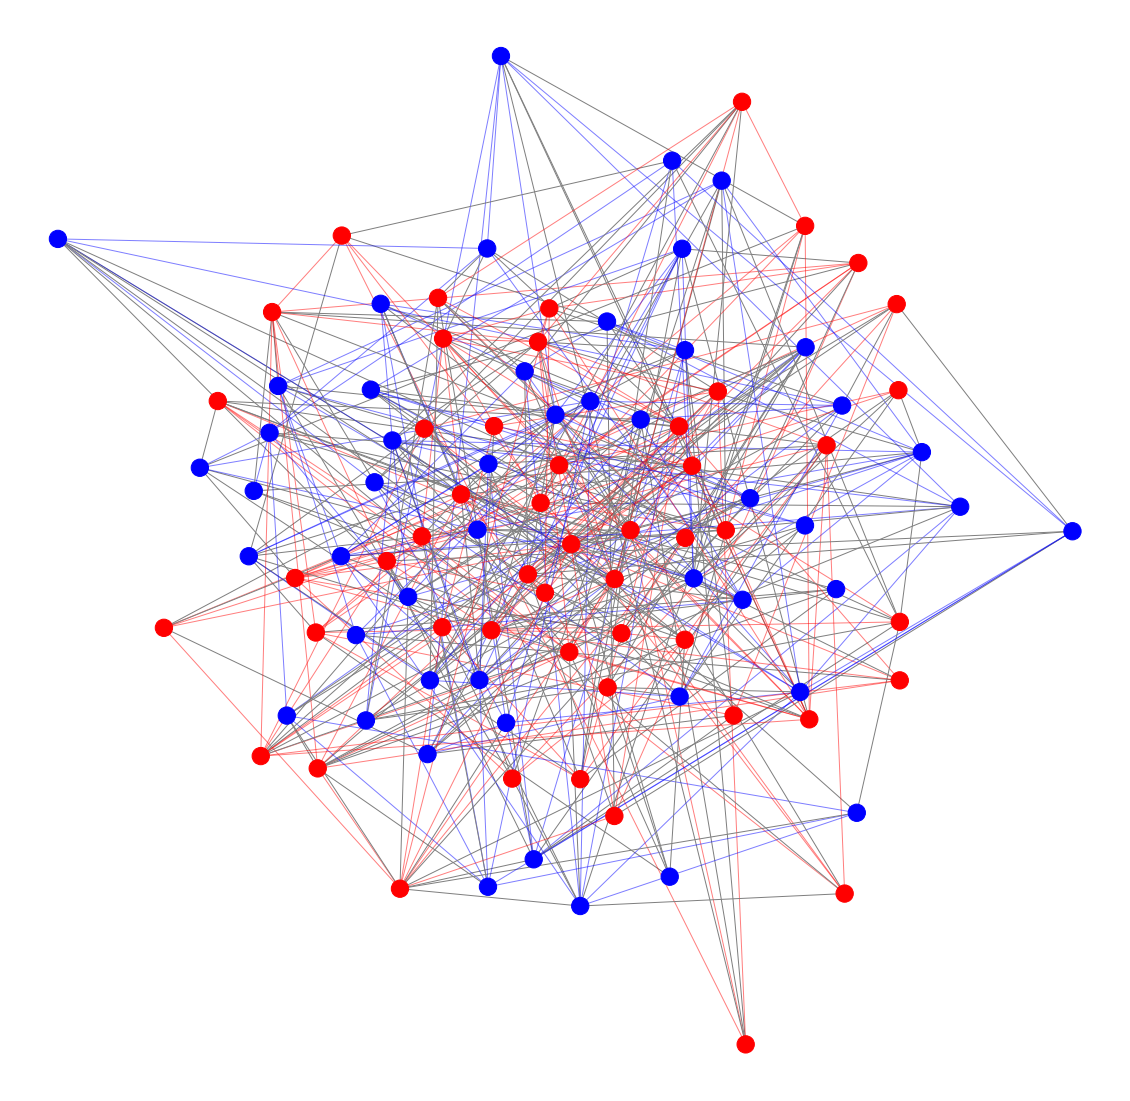

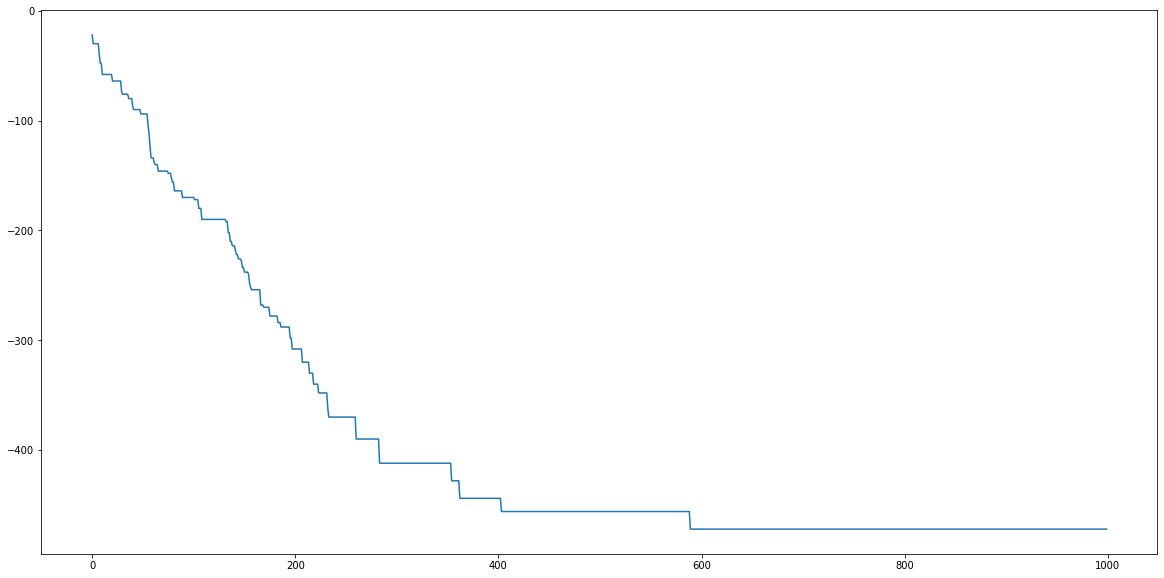

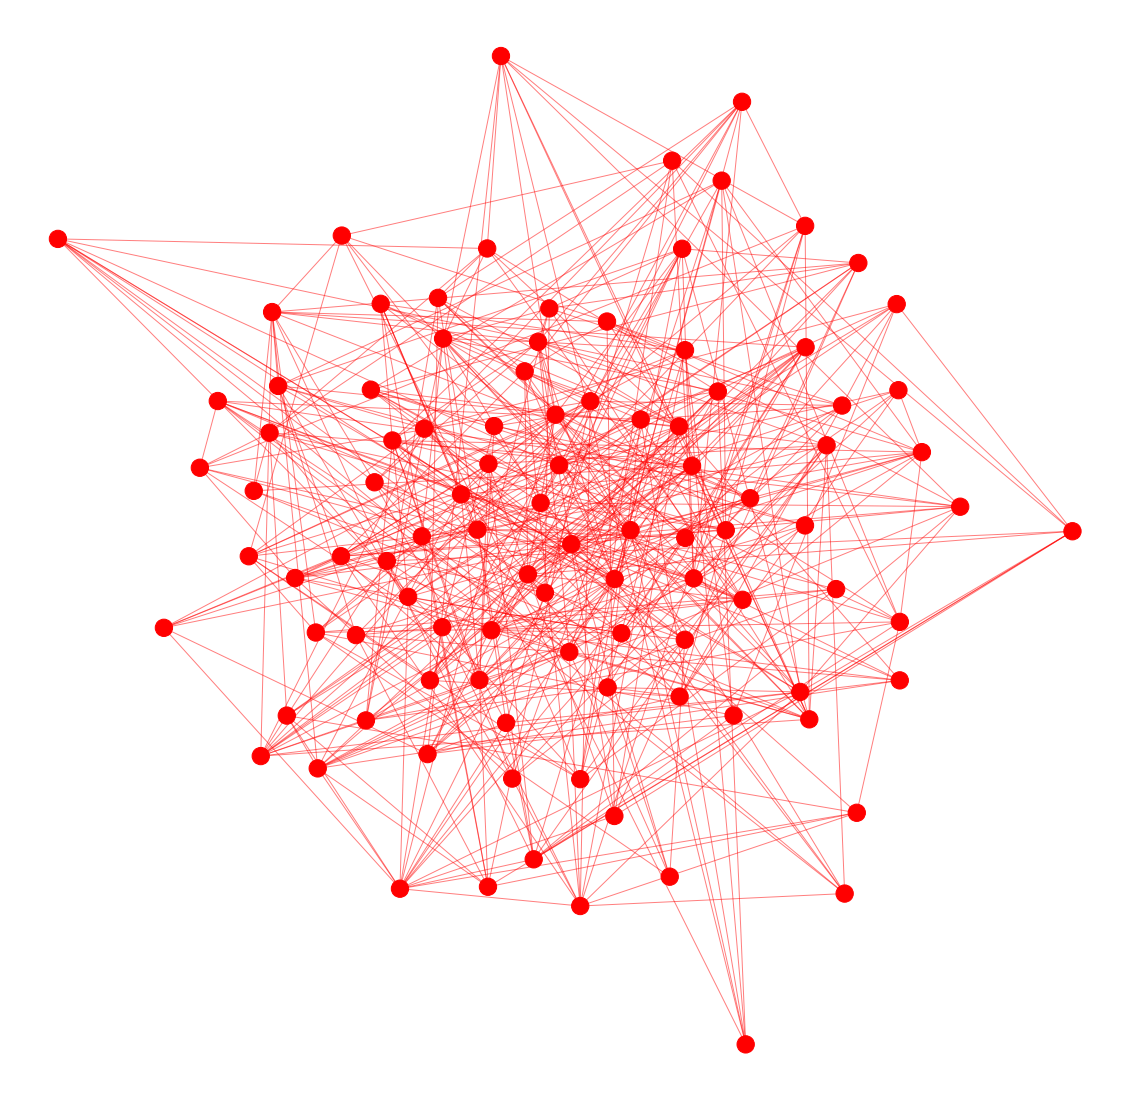

In [278]:
nb_steps = 1000
T = 10000
k_b = 1

J = 1

energies = []
probas = []
delta_energies = []


node_spins, graph = generate_graph(nb_nodes=100)

plot_graph(graph, node_spins, layout)


for _ in range(nb_steps):
    
    energy = compute_graph_energy(graph, node_spins)
    new_node_spins = node_spins.copy()
    
    # modification
    new_node_spins[np.random.randint(len(new_node_spins))] *= -1
        
    new_energy = compute_graph_energy(graph, new_node_spins, J=J)
    
    delta_energy = new_energy - energy
    
    if (
        (delta_energy < 0)  or 
        (np.random.uniform() > np.exp(delta_energy / (k_b * T)))
    ):
        node_spins = new_node_spins
    energies.append(energy)
    probas.append(np.exp(delta_energy / (k_b * T)))
    delta_energies.append(delta_energy)

    
# plt.figure(figsize=(20, 10))
# plt.plot(delta_energies)
# plt.show()

# plt.figure(figsize=(20, 10))
# plt.plot(probas)
# plt.show()

    
plt.figure(figsize=(20, 10))
plt.plot(energies)
plt.show()

plot_graph(graph, node_spins, layout)


In [279]:
min(probas)

0.997802418226309

In [259]:
new_node_spins

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [260]:
(node_spins != new_node_spins).sum()

1

In [261]:
new_node_spins[1] *= -1